In [194]:
from os.path import join
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import h5py
try:
    import GSHEWaveform
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import GSHEWaveform
import utils
from glob import glob
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
%matplotlib inline

## $\beta/M$ plots

In [196]:
loaddir = "/Users/stiskalek/Data/gshe_liv_alpha0/"

loaddir = '/home/miguel/code/notebooks/gw_data/liv_alpha0/'
#loaddir = '/home/miguel/Dropbox/Projects/AGN_strong_field_lensing_birefringence/liv_alpha0/'

files, names_all = utils.get_liv_fnames(loaddir)
print(files)

['liv_S190915ak_Aminus_alpha0p5.h5', 'liv_S190814bv_Aminus_alpha0.h5', 'liv_S190707q_Aminus_alpha0p5.h5', 'liv_S190828l_Aminus_alpha0.h5', 'liv_S190727h_Aminus_alpha0p5.h5', 'liv_S190727h_Aminus_alpha0.h5', 'liv_S190706ai_Aminus_alpha0p5.h5', 'liv_S190910s_Aminus_alpha0.h5', 'liv_S190828j_Aminus_alpha0p5.h5', 'liv_S190720a_Aminus_alpha0p5.h5', 'liv_S190728q_Aminus_alpha0p5.h5', 'liv_S190707q_Aminus_alpha0.h5', 'liv_S190910s_Aminus_alpha0p5.h5', 'liv_S190915ak_Aminus_alpha0.h5', 'liv_S190708ap_Aminus_alpha0.h5', 'liv_S190630ag_Aminus_alpha0.h5', 'liv_S190708ap_Aminus_alpha0p5.h5', 'liv_S190814bv_Aminus_alpha0p5.h5', 'liv_S190924h_Aminus_alpha0p5.h5', 'liv_S190720a_Aminus_alpha0.h5', 'liv_S190924h_Aminus_alpha0.h5', 'liv_S190728q_Aminus_alpha0.h5', 'liv_S190828l_Aminus_alpha0p5.h5', 'liv_S190706ai_Aminus_alpha0.h5', 'liv_S190828j_Aminus_alpha0.h5']


In [197]:
#importlib.reload(utils)

beta_over_M_raw = []

names = []
for i, file in enumerate(files):
    btOm = utils.beta_over_M_from_liv_samples(join(loaddir, file))
    if btOm is not None:
        beta_over_M_raw.append(btOm)
        names.append(names_all[i])


sort = np.argsort(names)
names = [names[i] for i in sort]
beta_over_M_raw = [beta_over_M_raw[i] for i in sort]

#print(beta_over_M)

/home/miguel/code/GSHE/scripts/utils.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename)


5.1289789580412446e-37 0.10748344433663357 513.439662785079
1.7142357034497966e-24 0.023895544665670836 107.67746594702116
5.643073585153921e-34 0.040191591837147066 183.285472032803
1.8188496276469956e-36 0.12428431827736532 600.2062246299839
2.874550303085862e-31 0.10580656060130728 504.87222362215834
2.700032554751823e-36 0.15698416009120825 773.826349324014
1.0161414113020987e-33 0.07373948952536315 344.3386302448116
3.0908561173119167e-28 0.12963607641800348 628.196196980851
5.572165117780664e-38 0.06412770280190548 297.46331897263667
5.622105989286632e-43 0.05335377028664135 245.61575639554468
1.7512832515250176e-23 0.04222169641694436 192.82608140066793
3.66280225190655e-27 0.1011897220313464 481.371878142331
8.078113225187563e-30 0.0918788638063888 434.37211817313903
2.5237173775838698e-25 0.03422049937047177 155.37951214539498
5.351692122864051e-29 0.05332671890487007 245.48650837661893
1.067990918363122e-45 0.04242143784522323 193.76622663621444
3.896874813560145e-40 0.023778

In [182]:
#print(beta_over_M)

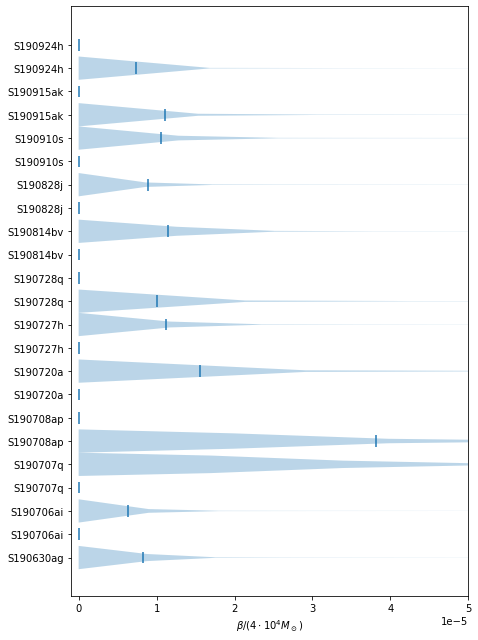

In [201]:
plt.figure(figsize=(9 * 0.75, 9))

#Coefficient from our long paper, eq 4.5
#assumes: luminosity_distance in Mpc, A0 = our c0 and is in ev^2
#NOTE: A0 in peV to eV 
beta_over_M = [bt*(1e-12)**2/(1e-23)**2/1e3*0.148/(5e4) for bt in beta_over_M_raw]

plt.violinplot(beta_over_M, showmeans=True, vert=False, showextrema=False, widths=1)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, names)
plt.xlim(-1e-6, 5e-5)
#plt.xscale('log')

plt.xlabel(r"$\beta/(4\cdot 10^4 M_\odot)$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

In [169]:
hi = [np.percentile(bt,95) for bt in beta_over_M]
low = [np.percentile(bt,5) for bt in beta_over_M]

#print(low)
print(hi)

[0.027811462291617906, 7.2273468383895396e-09, 0.021040773039115314, 2.626498153389469e-07, 0.48259021086484283, 0.1930286043587744, 3.054886021066584e-08, 2.2491530861481006e-08, 0.0545155588721776, 1.955430615564144e-08, 0.04330168965887073, 0.034351422226380615, 3.789500335879121e-08, 2.963819505481991e-08, 0.0338887210899589, 3.108632628100881e-08, 0.05532290380191249, 2.483747569095243e-08, 0.053156967931850485, 0.058363037361742406, 2.209978028194127e-08, 0.030742137506739528, 9.045141098617768e-08]


## $A_0$ plots

In [132]:
A0s = []

names = []
for i, file in enumerate(files):
    A0 = utils.A0_from_liv_samples(join(loaddir, file))
    if A0 is not None:
        A0s.append(A0 * 1e20)
        names.append(names_all[i])


sort = np.argsort(names)
names = [names[i] for i in sort]
A0s = [A0s[i] for i in sort]

#print(A0s)

/home/miguel/code/GSHE/scripts/utils.py:26: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename)


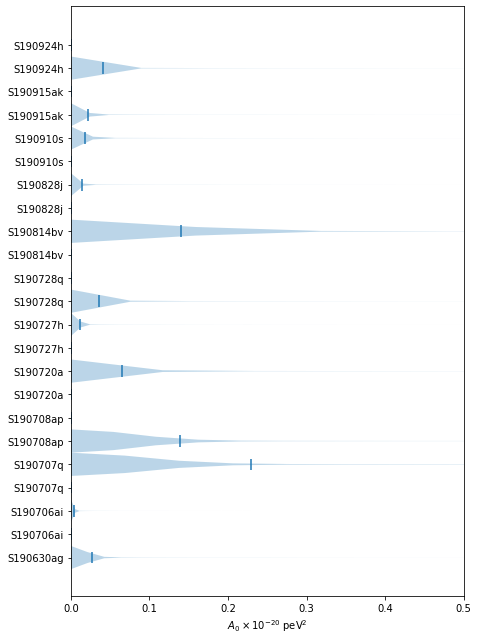

In [133]:
plt.figure(figsize=(9 * 0.75, 9))

plt.violinplot(A0s, showmeans=True, vert=False, showextrema=False, widths=1)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, names)
plt.xlim(0, 0.5)

plt.xlabel(r"$A_0 \times 10^{-20}~\mathrm{peV}^2$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

In [ ]:
Mpc

In [ ]:
from scipy.constants import e

In [ ]:
1 * e 